<a href="https://colab.research.google.com/github/SahilBeniwal22/DL/blob/main/DL_Exp_7(Fashion_Design).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
import matplotlib.pyplot as plt


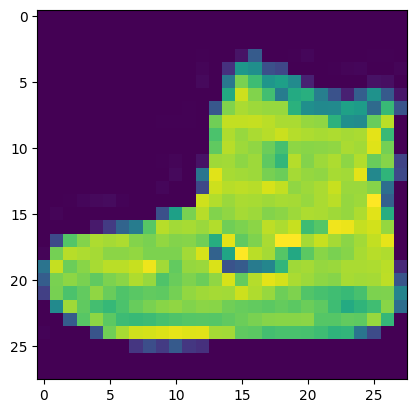

In [ ]:
image_to_view = x_train[0]

# Display the image
plt.imshow(image_to_view)
plt.show()

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
# Normalizing the X train and X test data
train_images_normalized = x_train/ 255.0
test_images_normalized = x_test/ 255.0

In [ ]:
# train_images_normalized

In [ ]:
x_test.shape

(10000, 28, 28)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

x_train.shape

In [ ]:
x_train_reshaped = train_images_normalized.reshape(train_images_normalized.shape[0], 28, 28, 1)

In [ ]:
x_test_reshaped =  test_images_normalized.reshape(test_images_normalized.shape[0], 28, 28, 1)

In [ ]:
# x_train = x_train.reshape(60000 , 28*28)
x_train = x_train.astype("float32")/255

In [ ]:
# x_test = x_test.reshape(10000 , 28*28)
x_test = x_test.astype("float32")/255

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert y_train and y_test to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_train_one_hot.shape

(60000, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.fit(x_train_reshaped,y_train_one_hot,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2088 - accuracy: 0.9241
Epoch 2/3
1090/1875 [================>.............] - ETA: 41s - loss: 0.1858 - accuracy: 0.9320

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

['loss', 'acc']

In [ ]:
loss , accuracy = model.evaluate(x_test_reshaped, y_test_one_hot)
accuracy

313/313 [==============================] - 7s 22ms/step - loss: 0.2788 - accuracy: 0.8999


0.8999000191688538

In [25]:
y_preds = model.predict(x_test_reshaped)

313/313 [==============================] - 4s 13ms/step


In [26]:
from sklearn.metrics import classification_report

In [27]:
import numpy as np

predicted_classes = np.argmax(y_preds , axis =1 )

In [28]:
print(classification_report(y_test , predicted_classes))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.87      0.83      1000
           3       0.95      0.88      0.91      1000
           4       0.79      0.89      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.76      0.63      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!